<a href="https://colab.research.google.com/github/Rkinbag/MLSA-TASK/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


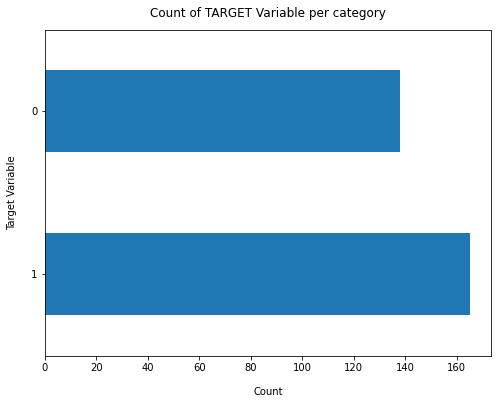

In [6]:
df['output'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category",y=1.02);

In [7]:
100*df['output'].value_counts()/len(df['output'])

1    54.455446
0    45.544554
Name: output, dtype: float64

kind of balanced

In [8]:
print(df.isnull().sum())


age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [9]:
labels = ["{0} - {1}".format(i, i + 10) for i in range(1, 77, 11)]

df['agegroup'] = pd.cut(df.age, range(1, 80, 10), right=False, labels=labels)


In [43]:
labels = ["{0} - {1}".format(i, i + 19) for i in range(94, 200, 20)]

df['trtbgroup'] = pd.cut(df.trtbps, range(94, 220, 20), right=False, labels=labels)

In [44]:
df['trtbgroup'].value_counts()

114 - 133    131
134 - 153     95
94 - 113      48
154 - 173     21
174 - 193      7
194 - 213      1
Name: trtbgroup, dtype: int64

In [45]:
df['agegroup'].value_counts()

56 - 66    129
45 - 55     76
67 - 77     73
34 - 44     18
23 - 33      1
1 - 11       0
12 - 22      0
Name: agegroup, dtype: int64

In [63]:
labels = ["{0} - {1}".format(i, i + 46) for i in range(126, 564, 47)]

df['cholgroup'] = pd.cut(df.chol, range(126, 590, 46), right=False, labels=labels)

In [64]:
df['cholgroup'].value_counts()

220 - 266    112
173 - 219     79
267 - 313     72
314 - 360     22
126 - 172     12
408 - 454      3
361 - 407      2
549 - 595      1
455 - 501      0
502 - 548      0
Name: cholgroup, dtype: int64

In [72]:
labels = ["{0} - {1}".format(i, i + 11) for i in range(71, 204, 12)]

df['thalachhgroup'] = pd.cut(df.thalachh, range(71, 210, 11), right=False, labels=labels)

In [73]:
df['thalachhgroup'].value_counts()

167 - 178    60
155 - 166    53
143 - 154    48
179 - 190    45
131 - 142    27
119 - 130    25
107 - 118    17
191 - 202    14
95 - 106      7
203 - 214     4
83 - 94       2
71 - 82       1
Name: thalachhgroup, dtype: int64

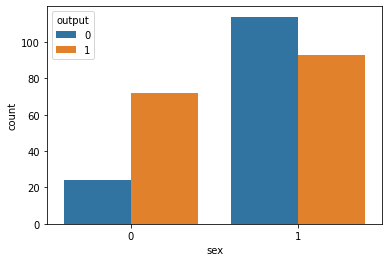

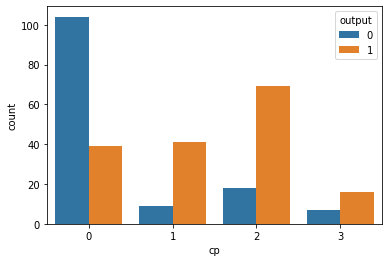

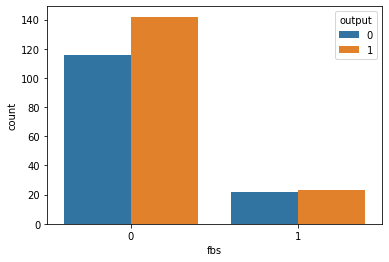

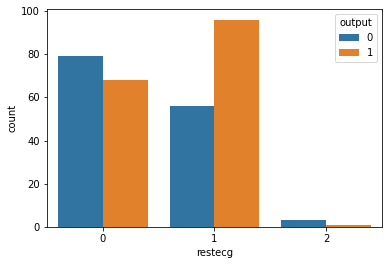

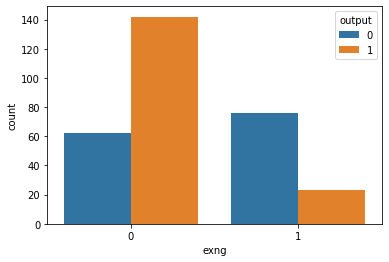

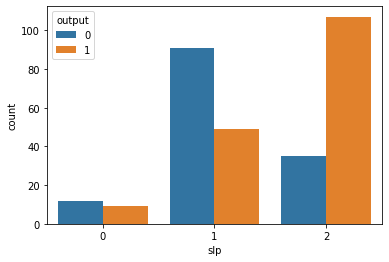

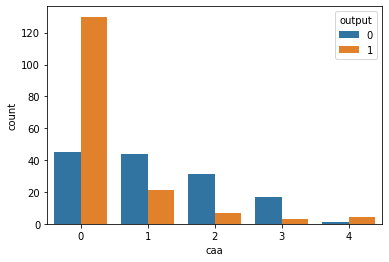

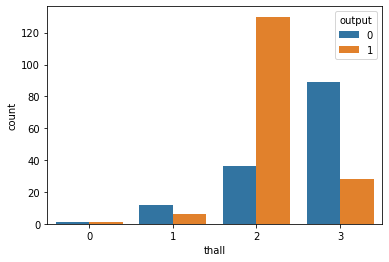

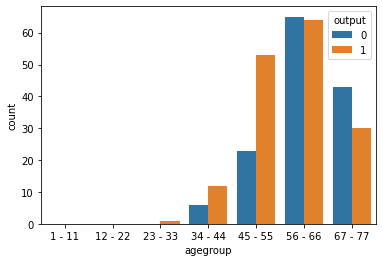

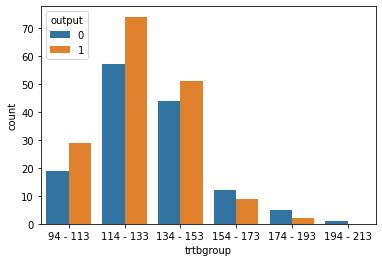

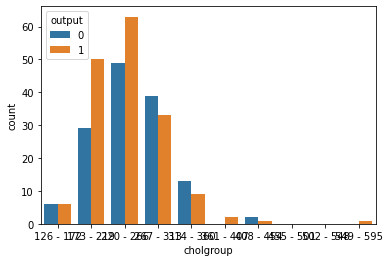

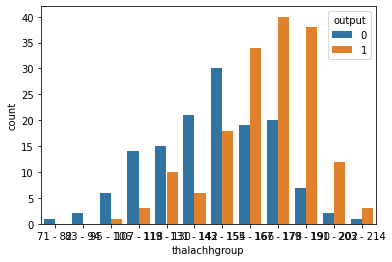

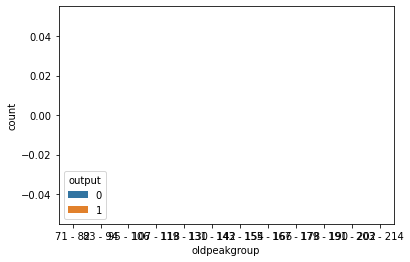

In [97]:
for i, predictor in enumerate(df.drop(columns=['thalachh', 'age', 'trtbps','chol','output','oldpeak'])):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='output')

Text(0.5, 1.0, 'Total output by thalachh')

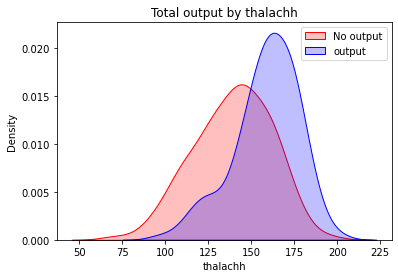

In [94]:
Tot = sns.kdeplot(df.thalachh[(df["output"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(df.thalachh[(df["output"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No output","output"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('thalachh')
Tot.set_title('Total output by thalachh')

Text(0.5, 1.0, 'Total output by cp')

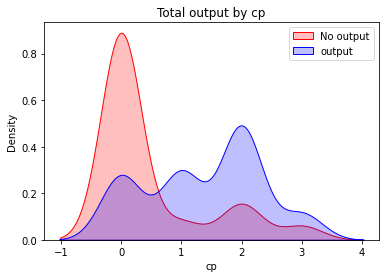

In [92]:
Tot = sns.kdeplot(df.cp[(df["output"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(df.cp[(df["output"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No output","output"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('cp')
Tot.set_title('Total output by cp')

Text(0.5, 1.0, 'Total output by slp')

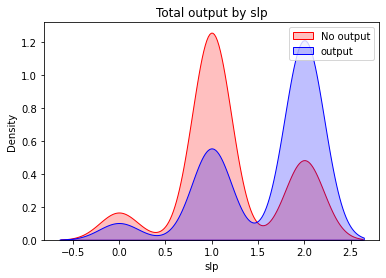

In [93]:
Tot = sns.kdeplot(df.slp[(df["output"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(df.slp[(df["output"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No output","output"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('slp')
Tot.set_title('Total output by slp')

Text(0.5, 1.0, 'Total output by oldpeak')

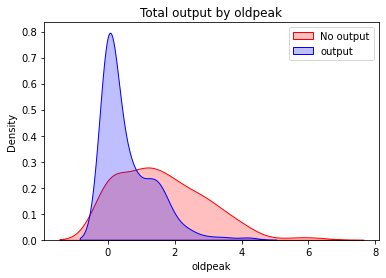

In [95]:
Tot = sns.kdeplot(df.oldpeak[(df["output"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(df.oldpeak[(df["output"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No output","output"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('oldpeak')
Tot.set_title('Total output by oldpeak')

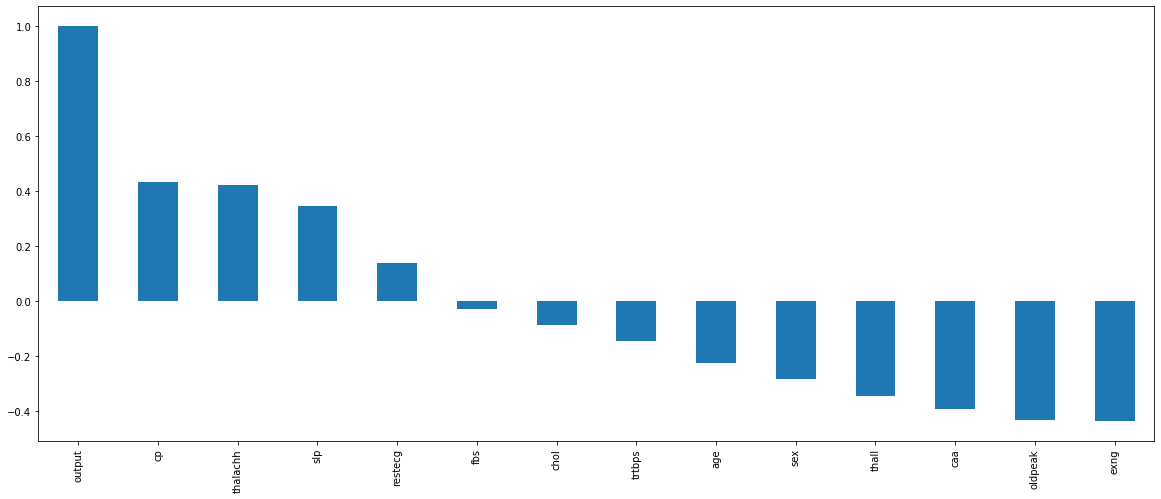

In [84]:
plt.figure(figsize=(20,8))
df.corr()['output'].sort_values(ascending = False).plot(kind='bar')

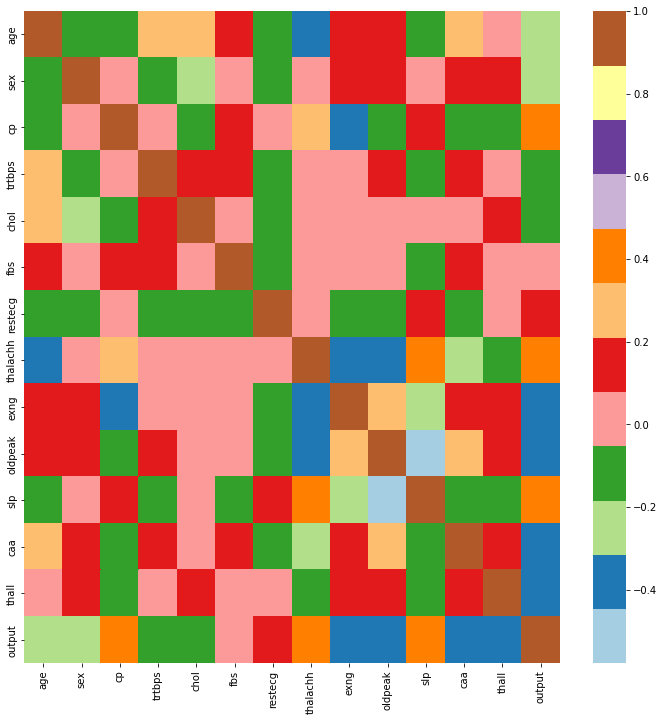

In [85]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), cmap="Paired")

# CONCLUSION


**1**.According to our correlation graph and heatmap there is positive correaltion between 
output and cp,thalacch,slp.

**2.** **from our countplot plots**

**plot 1** we can see people with sex='1' have a significantly high chances than people with sex='0'

**plot 2**  we can see people with cp=2 (atypical angina) have higher chances of attack

**plot  4** rest_ecg=1 (people having having ST-T wave abnormality ) have higher chances of attack

**plot 5** People with no exercise induced angina (exng = 0) have higher chance of heart attack.

**plot  8** people with 0 major vessel (ca=0) have higher chances of attack

**plot 9** people with thall=2 have higher chances 

**plot 10** in contrast to normal feeling that higher age lead to more attack our data shows no such relation , people in age (45-55) have more chances than any other group.

**Plot 11** no relation in resting blood pressure but in case of cholesterol graph , people having cholesterol level between 170 and 320 mg/dl have most chances for attack

**Plot 12** people with higher maximum heart rate achieved have higher chances of heart attack.

Now from **Kernel Distribution Estimation Plot** for oldpeak , we can see people with low oldpeak have significantly higher chances of attack.

